# Intro Optimal Binning

## Prepare Notebook

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = [8, 7]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%load_ext rich
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

## Generate Data

In [2]:
seed: int = sum(map(ord, "wolt"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

n = 100

x = rng.normal(loc=0, scale=0.5, size=(n, 1))
a = 2
b = 1
mu = a * x + b
y = rng.normal(loc=mu, scale=0.5)

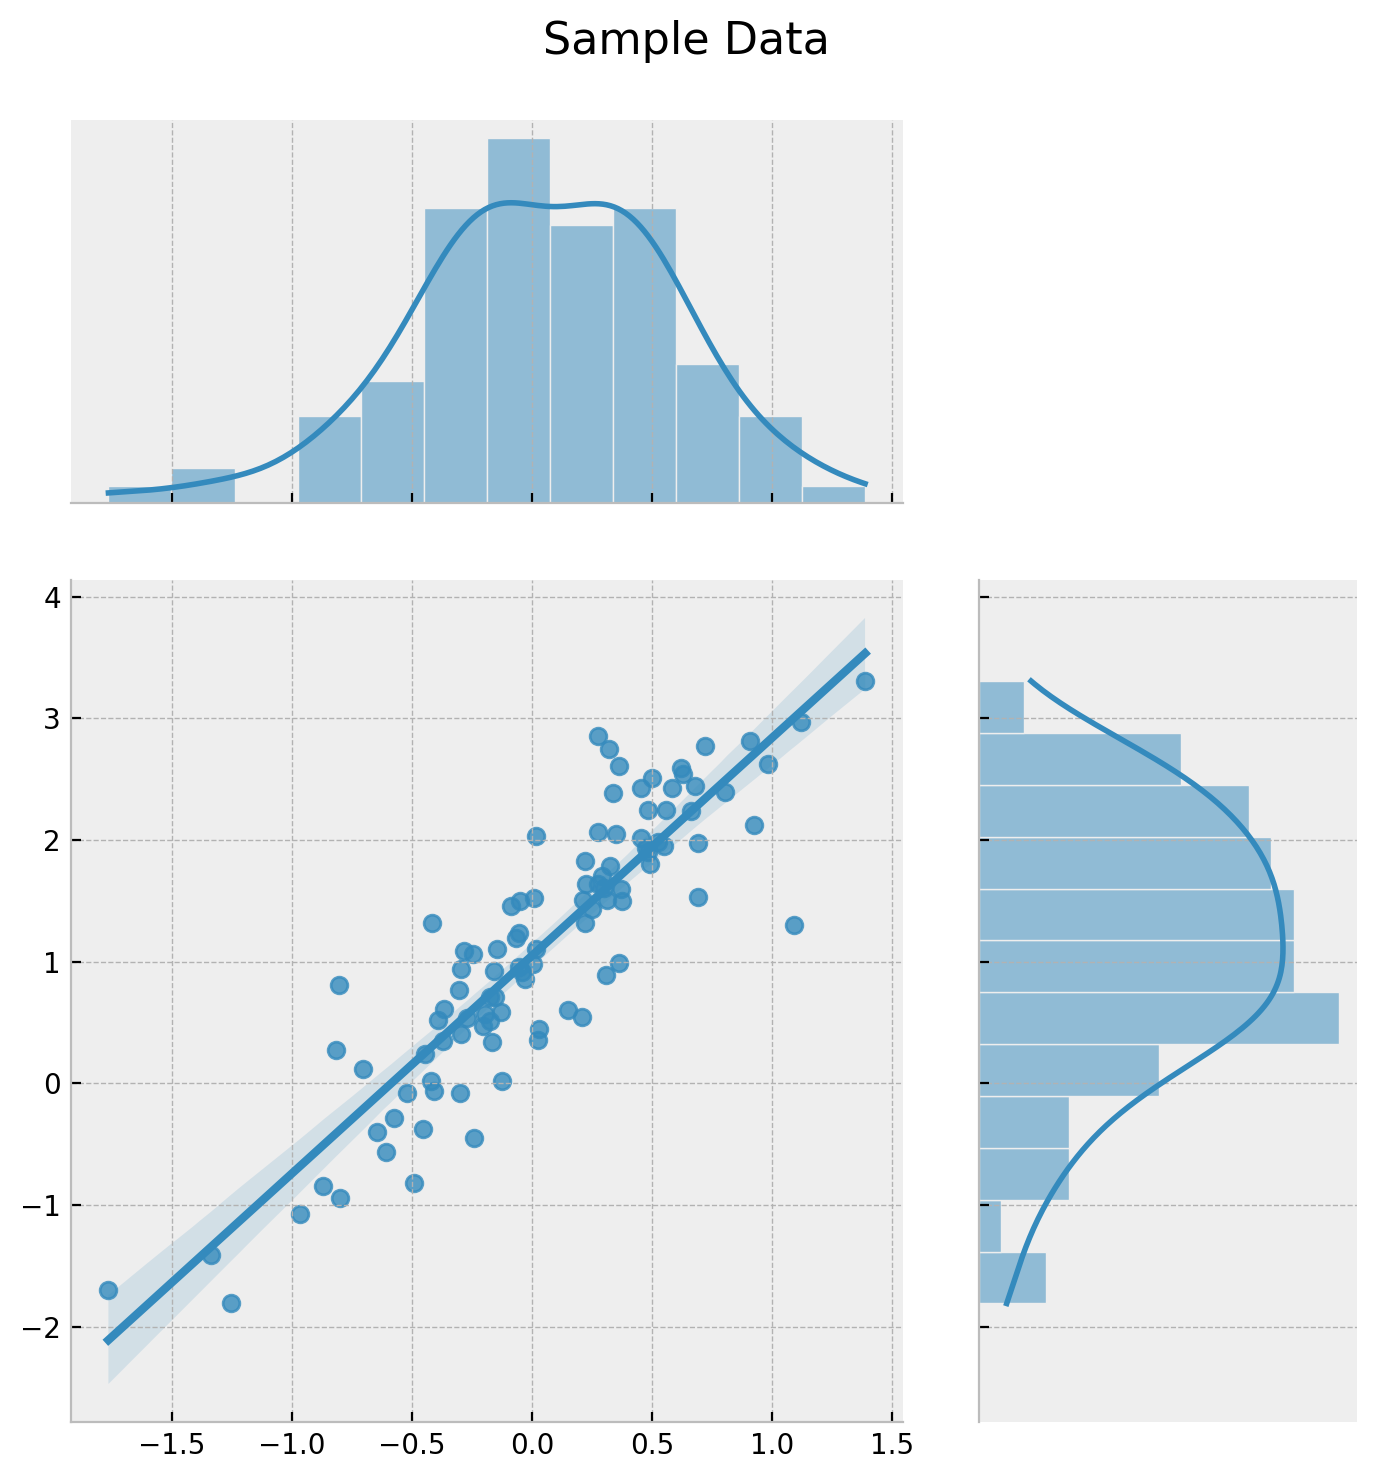

In [3]:
g = sns.jointplot(x=x.flatten(), y=y.flatten(), kind="reg", height=7, ratio=2, marginal_kws=dict(bins=12))
g.fig.suptitle("Sample Data", y=1.05, fontsize=16);

## Via Linear Regression

/Users/juanitorduz/.local/share/virtualenvs/website_projects-1IZj_WTw/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


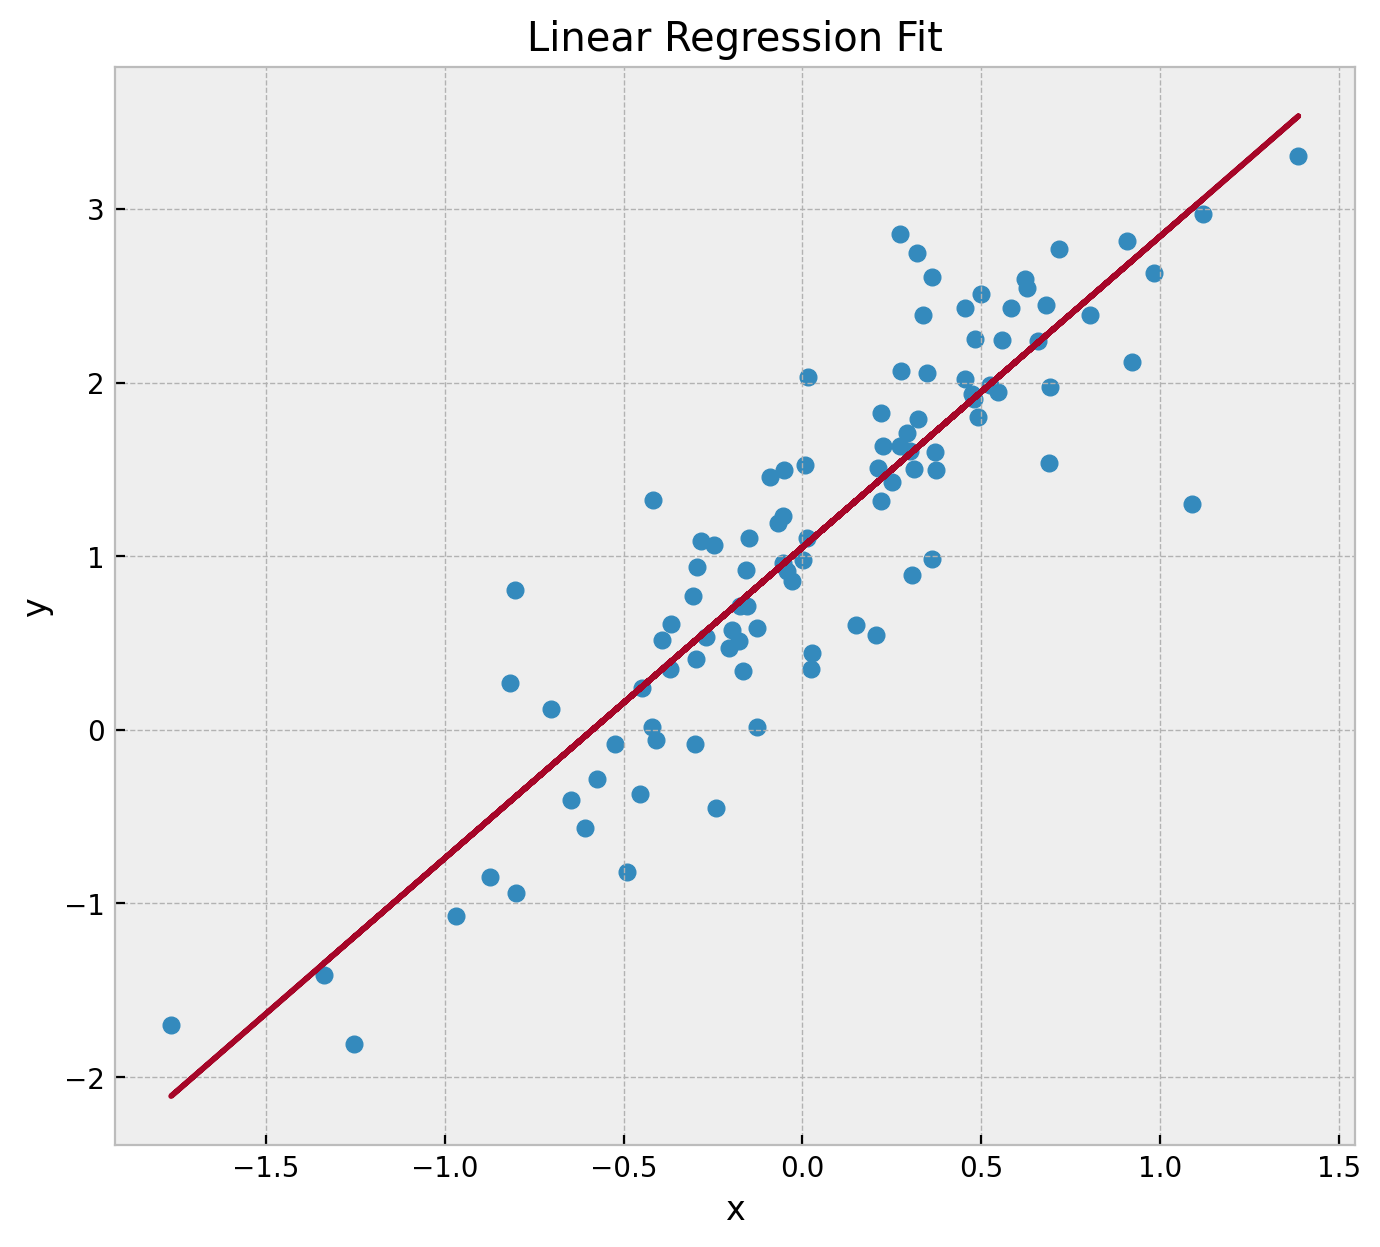

In [4]:
lr = LinearRegression(fit_intercept=True, normalize=False)
lr.fit(X=x, y=y)
y_pred = lr.predict(X=x)

fig, ax = plt.subplots()
ax.scatter(x=x, y=y, c="C0")
ax.plot(x, y_pred, c="C1")
ax.set(title="Linear Regression Fit", xlabel="x", ylabel="y");

In [5]:
quantiles = np.linspace(start=0.05, stop=0.95, num=5)

y_quantiles = np.quantile(a=y, q=quantiles)
# take the inverse via the fitted linear model
x_quantiles = ((y_quantiles - lr.intercept_) / lr.coef_).flatten()

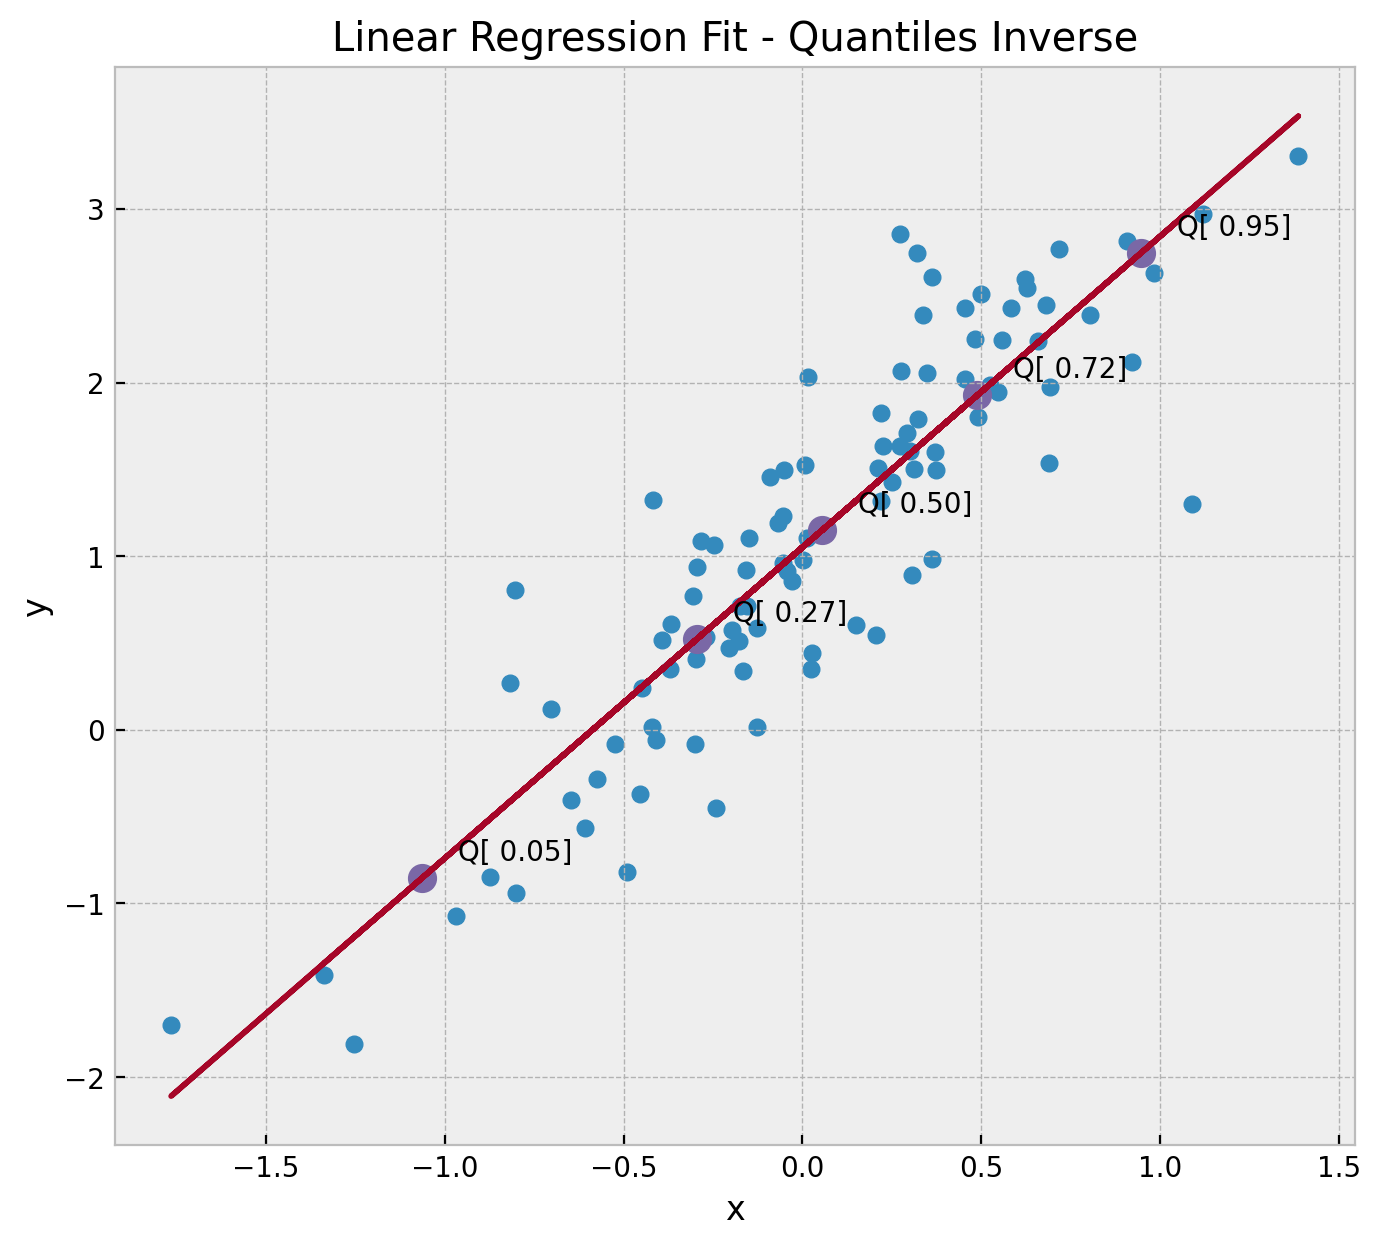

In [6]:
fig, ax = plt.subplots()
ax.scatter(x=x, y=y, c="C0")
ax.plot(x, y_pred, c="C1")

for i, (xq, yq) in enumerate(zip(x_quantiles, y_quantiles)):
    ax.scatter(x=xq, y=yq, c="C2", s=100)
    ax.annotate(f"Q[{quantiles[i]: .2f}]", xy=(xq, yq), xytext=(xq + 0.1, yq + 0.1))

ax.set(title="Linear Regression Fit - Quantiles Inverse", xlabel="x", ylabel="y");

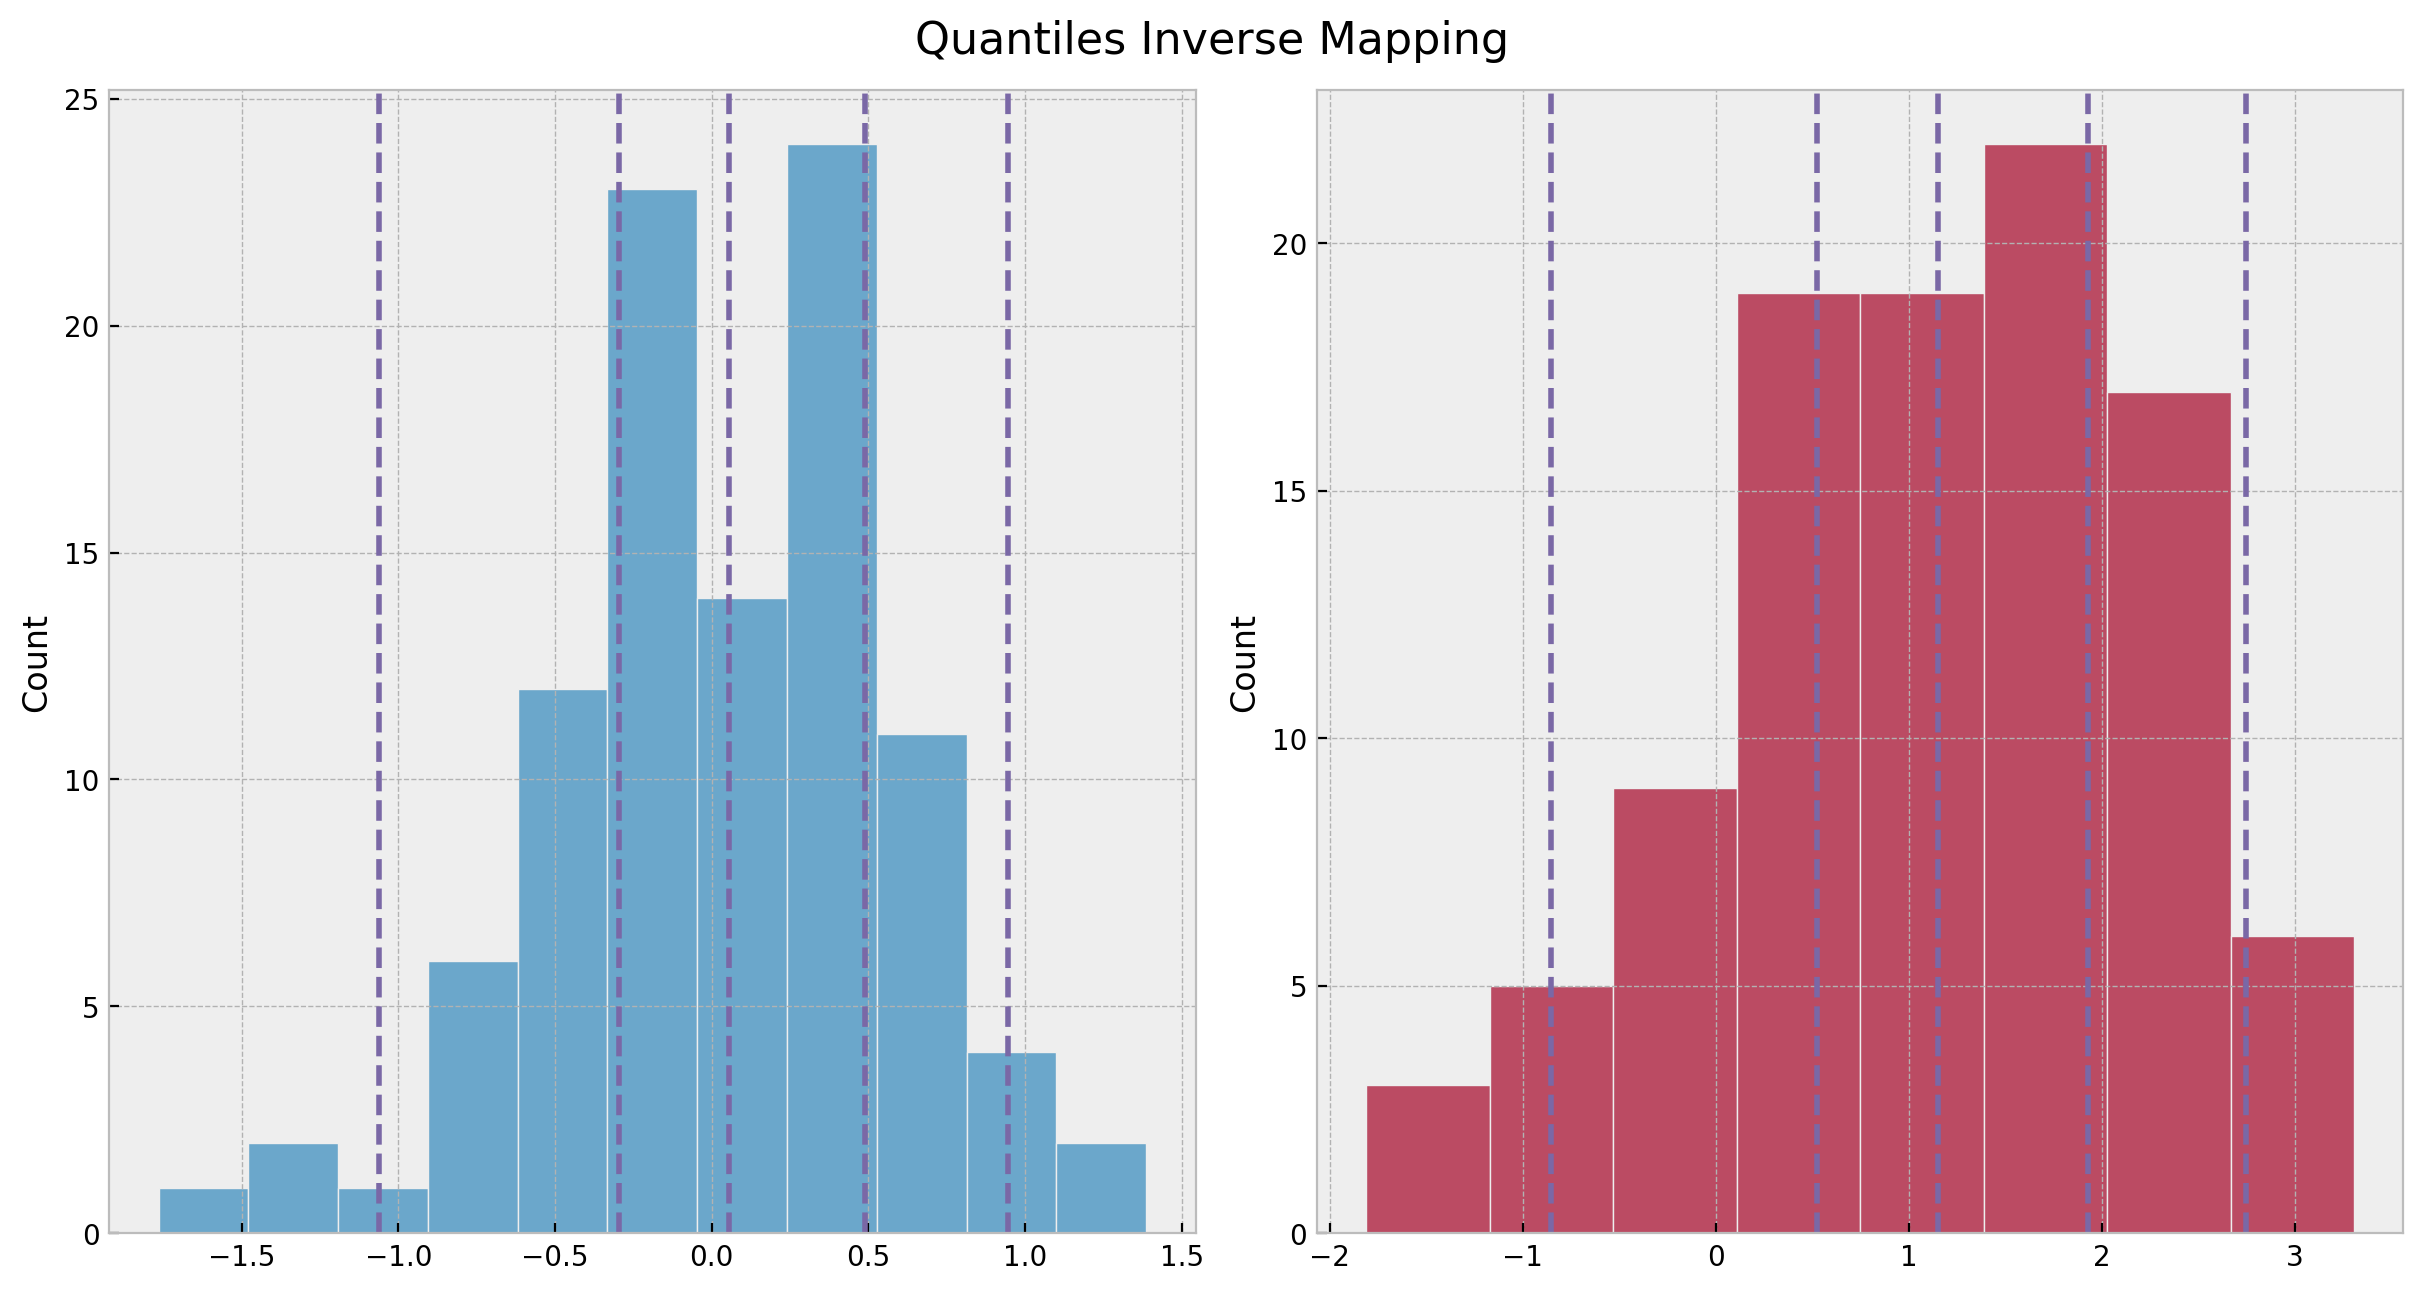

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), layout="constrained")

sns.histplot(x=x.flatten(), color="C0", ax=ax[0], alpha=0.7)
for xq in x_quantiles:
    ax[0].axvline(x=xq, c="C2", ls="--")

sns.histplot(x=y.flatten(), color="C1", ax=ax[1], alpha=0.7)
for yq in y_quantiles:
    ax[1].axvline(x=yq, c="C2", ls="--")

fig.suptitle("Quantiles Inverse Mapping", y=1.05, fontsize=16);

## Via `optbinning`

http://gnpalencia.org/optbinning/tutorials/tutorial_continuous.html

In [8]:
from optbinning import ContinuousOptimalBinning


optb = ContinuousOptimalBinning(name="y", dtype="numerical", max_n_bins=quantiles.shape[0] + 1)
optb.fit(x.flatten(), y.flatten())

ContinuousOptimalBinning(max_n_bins=6, name='y')

In [9]:
binning_table = optb.binning_table
binning_table.build()

,Bin,Count,Count (%),Sum,Std,Mean,Min,Max,Zeros count,WoE,IV
0,"(-inf, -0.84)",5,0.05,-6.839537,0.364496,-1.367907,-1.809799,-0.847893,0,-2.493208,0.124660
1,"[-0.84, -0.45)",10,0.10,-2.276467,0.498458,-0.227647,-0.939678,0.804337,0,-1.352947,0.135295
2,"[-0.45, 0.21)",40,0.40,28.912394,0.49723,0.722810,-0.451662,2.030848,0,-0.402491,0.160996
3,"[0.21, 0.63)",32,0.32,61.691300,0.478526,1.927853,0.894327,2.853845,0,0.802553,0.256817
4,"[0.63, 0.71)",5,0.05,10.738029,0.363829,2.147606,1.534287,2.544890,0,1.022305,0.051115
5,"[0.71, inf)",8,0.08,20.304318,0.575172,2.538040,1.299803,3.306676,0,1.412739,0.113019
6,Special,0,0.00,0.000000,NaN,0.000000,NaN,NaN,0,-1.125300,0.000000
7,Missing,0,0.00,0.000000,NaN,0.000000,NaN,NaN,0,-1.125300,0.000000
Totals,,100,1.00,112.530037,,1.125300,-1.809799,3.306676,0,9.736844,0.841903


## Comparison

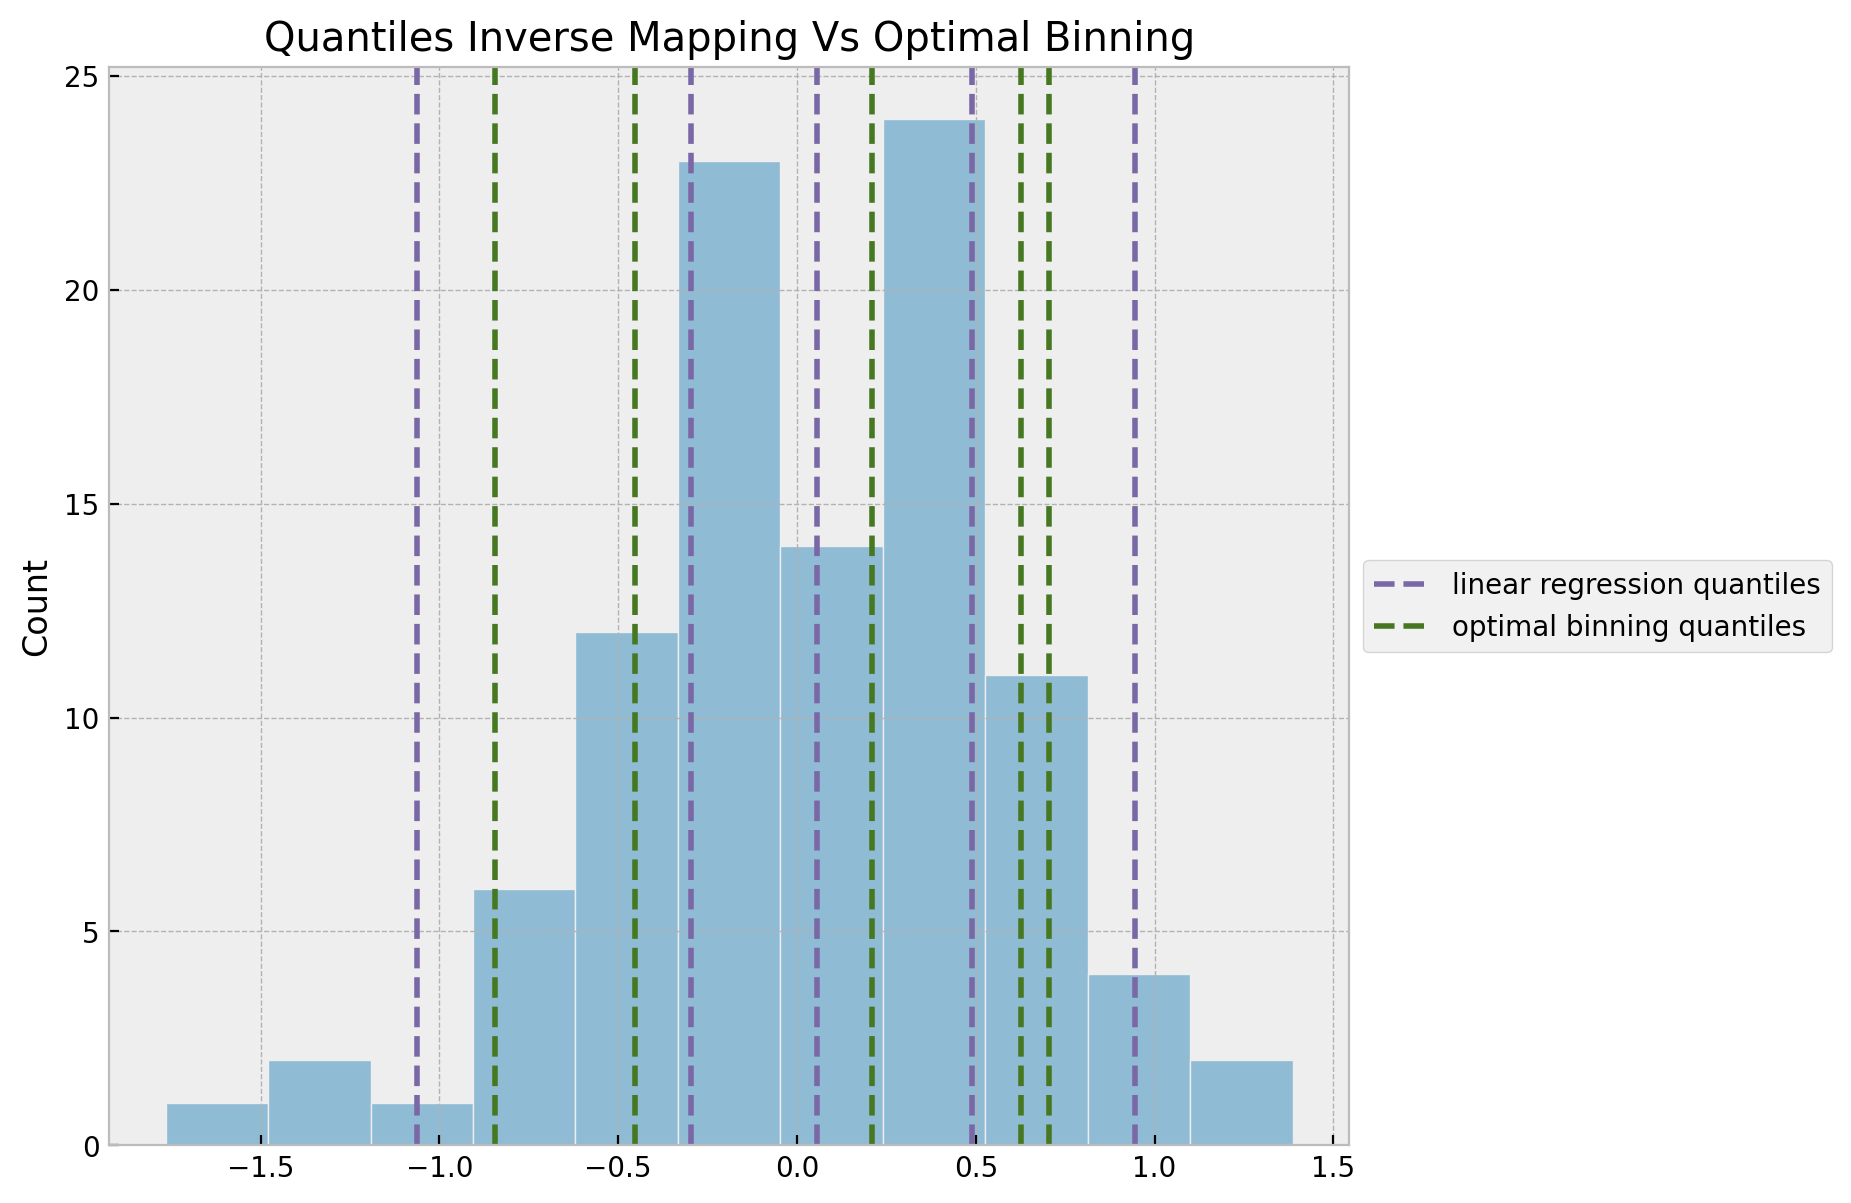

In [10]:
fig, ax = plt.subplots()

sns.histplot(x=x.flatten(), color="C0", ax=ax, alpha=0.5)

for i, xq in enumerate(x_quantiles):
    label = "linear regression quantiles" if i == 0 else None
    ax.axvline(x=xq, c="C2", ls="--", label=label)

for i, xq in enumerate(binning_table.splits):
    label = "optimal binning quantiles" if i == 0 else None
    ax.axvline(x=xq, c="C3", ls="--", label=label)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set(title="Quantiles Inverse Mapping Vs Optimal Binning");